genes_of_interest = ['Ctla4', 'Pdcd1', 'Cd274', 'Il2', 'Il12a', 'Il12b', 'Lag3', 'Havcr2']

**Reading in data, verifying it**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
import squidpy as sq
import os

In [2]:
ad_young = sc.read_h5ad("/home/timliu/Projects/aging_mice/data/merfish/young_tumour_labeled.h5ad")

In [3]:
ad_aged = sc.read_h5ad("/home/timliu/Projects/aging_mice/data/merfish/aged_tumour_labled.h5ad")

In [4]:
print(ad_young)
ad_young.obs

AnnData object with n_obs × n_vars = 102305 × 496
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'orig.ident', 'nCount_Vizgen', 'nFeature_Vizgen', 'z', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'seurat_clusters', 'SCT_snn_res.0.3', 'cell_type', 'cancers', 'macrophages'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'


,fov,volume,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,...,nFeature_Vizgen,z,nCount_SCT,nFeature_SCT,SCT_snn_res.0.1,seurat_clusters,SCT_snn_res.0.3,cell_type,cancers,macrophages
4656920300001100003,786,416.002636,1164.597387,437.372963,1174.156664,443.085491,1.673469,18,0.610835,6.890080,...,16,3,40,17,0,0,0,Cancer,Cancer,NaN
4656920300001100007,786,1072.988925,1135.670836,450.399724,1145.820604,463.070971,1.249955,62,0.360499,6.951451,...,42,3,61,42,0,0,0,Cancer,Cancer,NaN
4656920300001100008,786,1219.335590,1170.147310,453.567115,1181.739385,467.474836,1.249576,158,0.352357,6.753811,...,66,3,74,40,4,5,5,Endothelial/fibroblasts,immune,NaN
4656920300001100010,786,603.535420,1158.664603,456.596672,1166.480321,466.521316,1.309064,104,0.510236,6.632152,...,62,3,76,59,4,5,5,Endothelial/fibroblasts,immune,NaN
4656920300001100011,786,427.409171,1142.918462,465.128542,1151.653096,472.084317,1.303535,106,0.623767,6.397792,...,62,3,78,60,0,0,0,Cancer,Cancer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656920300126200075,468,2400.562754,3694.916209,5035.994760,3714.429484,5053.411459,1.256301,26,0.251937,6.768803,...,17,3,48,18,7,13,13,Blood vessel,Cancer,NaN
4656920300126200089,468,1416.941014,3612.069750,5125.410087,3628.053455,5137.389389,1.577465,17,0.357571,6.463300,...,14,3,36,15,4,5,5,Endothelial/fibroblasts,immune,NaN
4656920300126200091,468,1396.793413,3607.879856,5132.289528,3622.452613,5147.252114,1.206449,11,0.334516,6.736147,...,7,3,36,10,0,0,0,Cancer,Cancer,NaN
4656920300127100015,464,1226.810293,3906.472349,4888.760111,3919.665706,4900.934193,1.155396,21,0.340882,6.843979,...,20,3,45,22,2,4,4,High Mt cancer,High Mt cancer,NaN


In [5]:
print(ad_aged)
ad_aged.obs

AnnData object with n_obs × n_vars = 268298 × 496
    obs: 'fov', 'volume', 'min_x', 'min_y', 'max_x', 'max_y', 'anisotropy', 'transcript_count', 'perimeter_area_ratio', 'solidity', 'Cellbound2_raw', 'Cellbound2_high_pass', 'DAPI_raw', 'DAPI_high_pass', 'PolyT_raw', 'PolyT_high_pass', 'Cellbound1_raw', 'Cellbound1_high_pass', 'Cellbound3_raw', 'Cellbound3_high_pass', 'n_counts', 'leiden', 'orig.ident', 'nCount_Vizgen', 'nFeature_Vizgen', 'z', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'seurat_clusters', 'cell_type', 'SCT_snn_res.0.1', 'cell_type2', 'cell_type3', 'pamp', 'cancers'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


,fov,volume,min_x,min_y,max_x,max_y,anisotropy,transcript_count,perimeter_area_ratio,solidity,...,nCount_SCT,nFeature_SCT,SCT_snn_res.0.3,seurat_clusters,cell_type,SCT_snn_res.0.1,cell_type2,cell_type3,pamp,cancers
3987072700007100011,1793,858.975010,3944.739171,2603.774280,3954.954698,2614.579276,1.077003,10,0.397600,7.000000,...,177,84,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune
3987072700007100012,1793,1216.416548,4042.262107,2660.662367,4053.094292,2676.366451,1.633141,137,0.364026,6.729022,...,213,88,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune
3987072700007100016,1793,1243.291659,4050.400827,2680.149674,4062.356324,2692.767848,1.076842,58,0.340148,6.874839,...,203,72,4,0,Monocytes,0,Monocytes,Monocytes,NaN,immune
3987072700007100017,1793,1344.643803,4033.505195,2683.068544,4050.502329,2696.563318,1.944082,39,0.456130,6.009902,...,192,81,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune
3987072700007100031,1794,1918.675554,3710.850785,2791.303464,3727.616499,2807.503557,1.345634,40,0.273577,6.953225,...,185,84,8,4,T-cells,4,T-cells,T-cells,NaN,immune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987072700297200193,1673,2090.315472,4708.369040,10499.873250,4728.036370,10513.747725,1.499335,52,0.289430,6.408598,...,194,74,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune
3987072700297200228,1592,2563.973529,4918.928278,10526.963493,4940.718179,10547.255425,1.620260,10,0.300185,5.783641,...,174,86,9,0,Cancer,0,Cancer,Cancer,NaN,Cancer
3987072700297200240,1673,2036.782352,4732.568528,10541.109496,4753.612283,10553.876771,1.711581,60,0.294295,6.488373,...,196,68,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune
3987072700297200280,1592,1269.007533,4960.611799,10576.810686,4972.976718,10589.937284,1.302185,11,0.345579,6.762542,...,171,86,2,1,Primary DCs,1,Primary DCs,Primary DCs,NaN,immune


In [6]:
print(ad_young.uns['spatial'].keys())
print(ad_aged.uns['spatial'].keys())

dict_keys(['library'])
dict_keys(['library'])


In [7]:
genes_of_interest = ['Ctla4', 'Pdcd1', 'Cd274', 'Il2', 'Il12a', 'Il12b', 'Lag3', 'Havcr2']

Seeing distribution of genes

In [8]:
def save_spatial_scatter(adata, gene_name, save_dir, group):
    """
    Saves spatial scatter plot for given gene

    Parameters:
    gene_name: Name of gene
    save_dir: Directory to save
    """
    # Import the required library within the function to avoid global dependencies
    import scanpy as sc

    # Ensure the save directory exists, create it if not
    os.makedirs(save_dir, exist_ok=True)

    if group == "Aged":
        # Specify the file name for saving the plot
        file_name = f"{gene_name}_aged_distribution.png"
        save_path = os.path.join(save_dir, file_name)
        # Generate and save the plot
        sq.pl.spatial_scatter(
            adata,
            color=str(gene_name),
            size=0.5,
            figsize=(5, 5),
            title=f"Spatial distribution of {gene_name} in Aged",
            shape=None,
            save=save_path
        )
        
    else:
       # Specify the file name for saving the plot
        file_name = f"{gene_name}_young_distribution.png"
        save_path = os.path.join(save_dir, file_name)
        # Generate and save the plot
        sq.pl.spatial_scatter(
            adata,
            color=str(gene_name),
            size=0.5,
            figsize=(5, 5),
            title=f"Spatial distribution of {gene_name} in Young",
            shape=None,
            save=save_path
        )

    print(f"Plot saved to {save_path}")

Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Ctla4_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Pdcd1_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Cd274_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Il2_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Il12a_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Il12b_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Lag3_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Havcr2_aged_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Ctla4_young_distribution.png
Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/Pdcd1_young_distribution.png
Plot saved

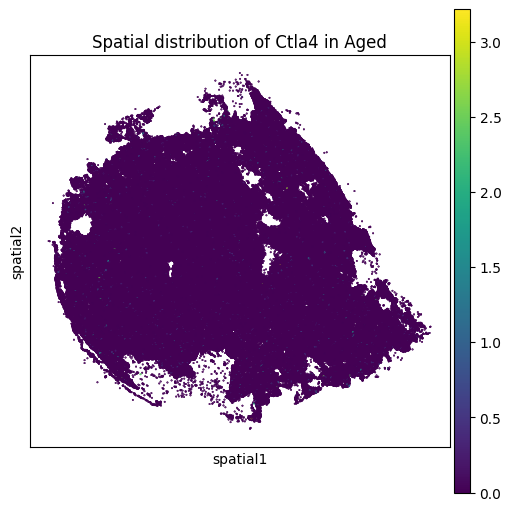

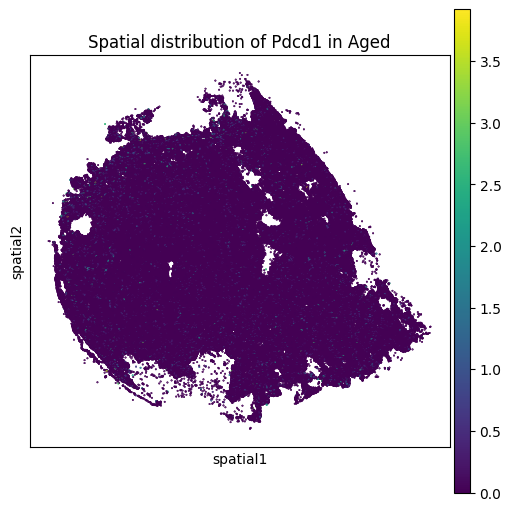

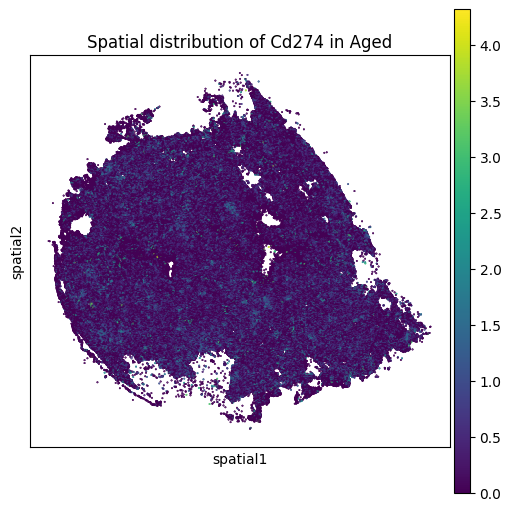

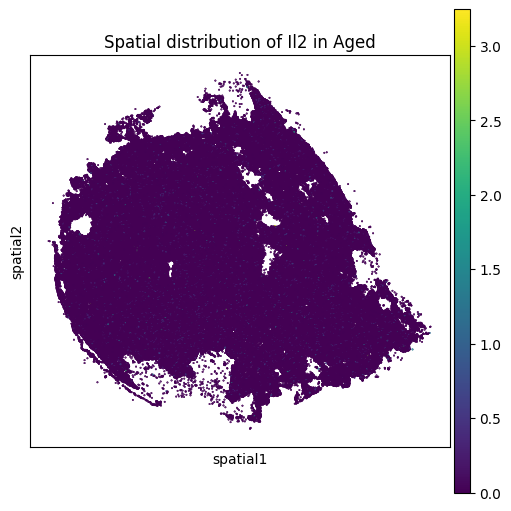

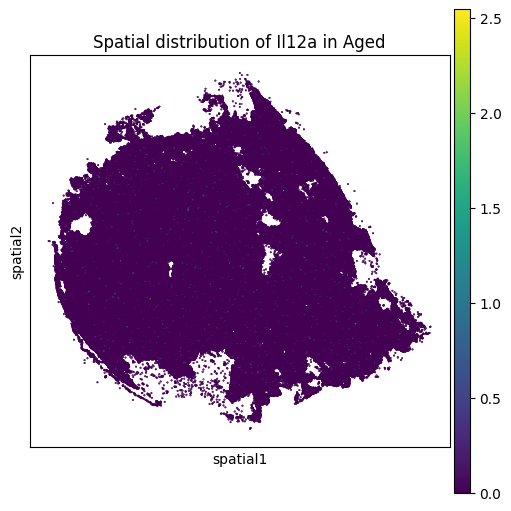

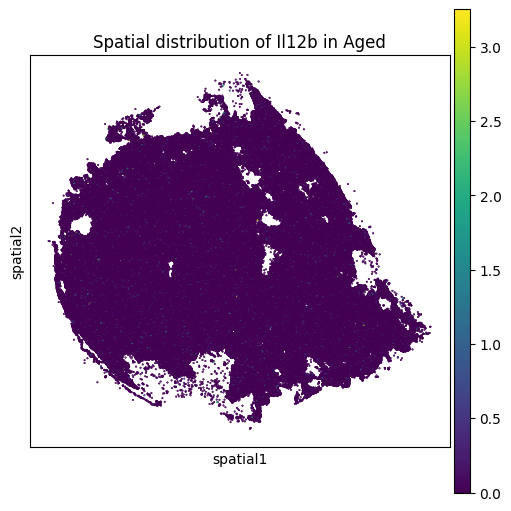

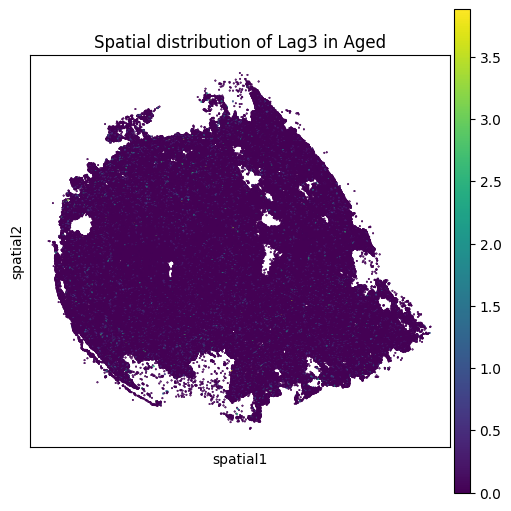

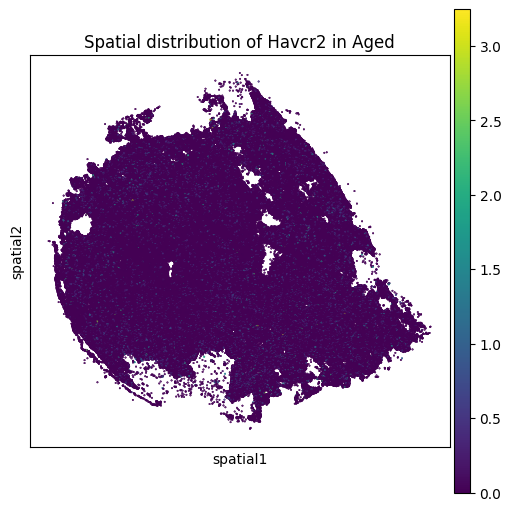

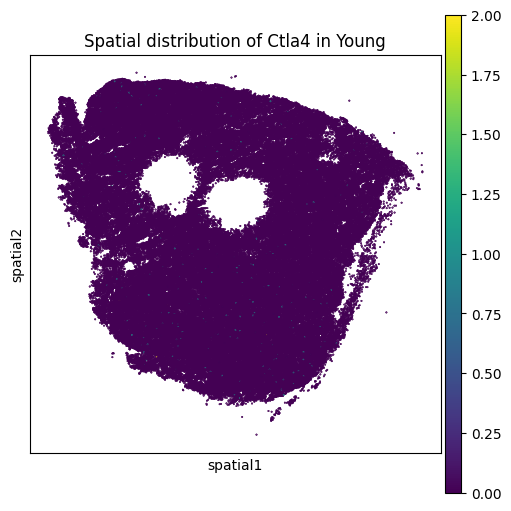

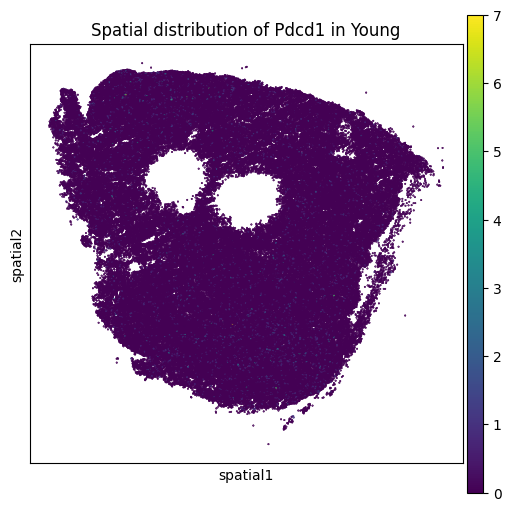

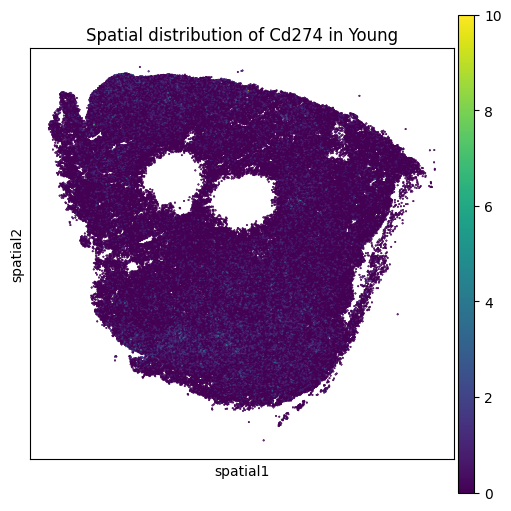

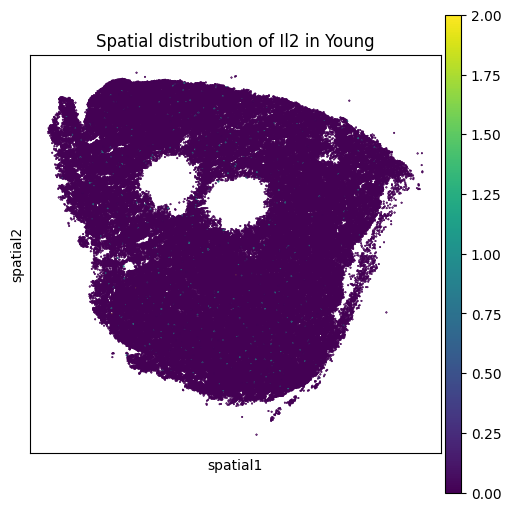

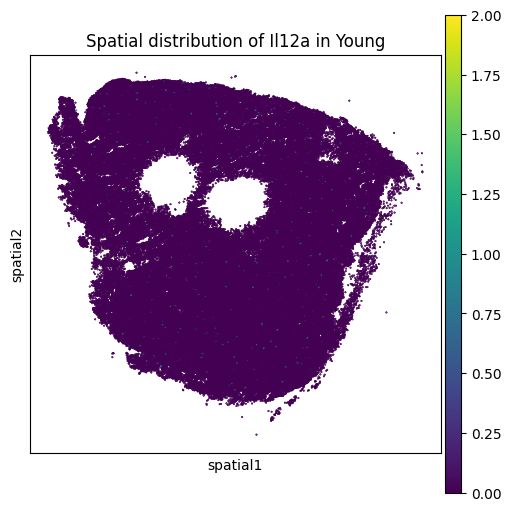

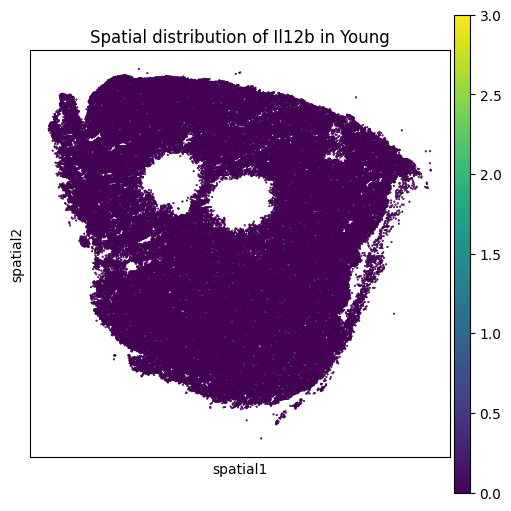

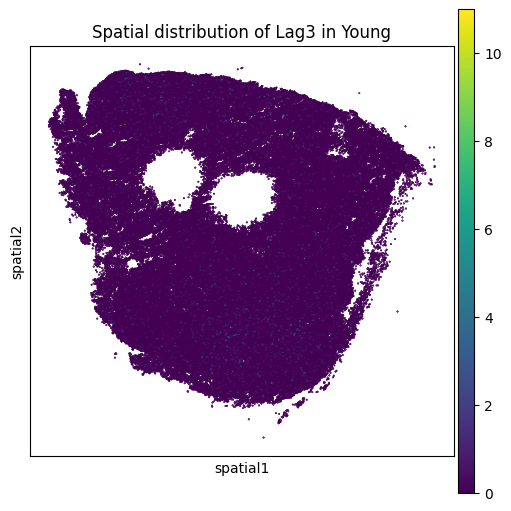

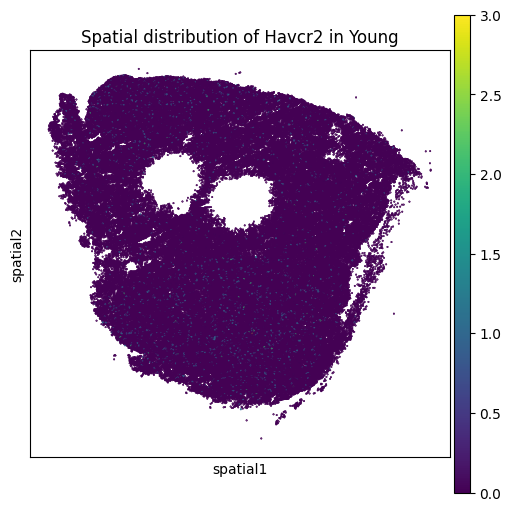

In [9]:
save_dir = "/home/timliu/Projects/aging_mice/plots/genes_of_interest"

for gene_name in genes_of_interest:
    save_spatial_scatter(adata=ad_aged, gene_name=gene_name, save_dir=save_dir, group = "Aged")
    
for gene_name in genes_of_interest:
    save_spatial_scatter(adata=ad_young, gene_name=gene_name, save_dir=save_dir, group = "Young")

Co-Occurence on Young and Aged

In [10]:
def analyze_gene_expression_with_subsamples(ad, gene_name, dataset_name, num_subsamples=4, subsample_fraction=0.5):
    if gene_name not in ad.var_names:
        print(f"Gene {gene_name} not found in {dataset_name} dataset.")
        return
    
    # Create subsamples
    subsamples = [sc.pp.subsample(ad, fraction=subsample_fraction, random_state=i, copy=True) for i in range(num_subsamples)]
    
    for i, subsample in enumerate(subsamples):
        # Convert sparse matrix to dense format and determine expressing cells
        gene_expression = subsample[:, gene_name].X.toarray()
        cells_expressing_gene = np.array(gene_expression > 0).flatten()
        
        expression_column_name = f'{gene_name}_expression'
        subsample.obs[expression_column_name] = 'not_expressing'
        subsample.obs.loc[cells_expressing_gene, expression_column_name] = f'expressing_{gene_name}'
        
        # Convert from string to categorical values
        subsample.obs[expression_column_name] = pd.Categorical(subsample.obs[expression_column_name])
        
        # Add new category in cell_type for cells that express the gene
        subsample.obs['cell_type'] = subsample.obs['cell_type'].cat.add_categories([f'expressing_{gene_name}'])
        
        # Update cell type for expressing cells
        subsample.obs.loc[subsample.obs[expression_column_name] == f'expressing_{gene_name}', 'cell_type'] = f'expressing_{gene_name}'
        
        # Calculate and plot co-occurrence for the subsample
        sq.gr.co_occurrence(subsample, cluster_key="cell_type")
        plot_path = f"/home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_{gene_name}_{dataset_name}_subsample_{i+1}.png"
        sq.pl.co_occurrence(
            subsample,
            cluster_key="cell_type",
            clusters=f"expressing_{gene_name}",
            figsize=(8, 5),
            dpi=300,
            save=plot_path
        )
        plt.title(f"Co-Occurrence {dataset_name.capitalize()} Subsample {i+1}")
        plt.clf()
        print(f"Co-occurrence analysis done for {gene_name} in {dataset_name} dataset, subsample {i+1}. Plot saved to {plot_path}")

# Process each gene for the young dataset
for gene in genes_of_interest:
    analyze_gene_expression_with_subsamples(ad_young, gene, 'young')

# Process each gene for the aged dataset
for gene in genes_of_interest:
    analyze_gene_expression_with_subsamples(ad_aged, gene, 'aged')


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.


/home/timliu/miniconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_graph.py:367: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(


Co-occurrence analysis done for Il12b in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_young_subsample_4.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in young dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_young_subsample_1.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in young dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_young_subsample_2.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in young dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_young_subsample_3.png


  0%|          | 0/325 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in young dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_young_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Ctla4 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Ctla4_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Pdcd1 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Pdcd1_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Cd274 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Cd274_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il2 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il2_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12a in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12a_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Il12b in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Il12b_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Lag3 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Lag3_aged_subsample_4.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in aged dataset, subsample 1. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_aged_subsample_1.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in aged dataset, subsample 2. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_aged_subsample_2.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in aged dataset, subsample 3. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_aged_subsample_3.png


  0%|          | 0/2211 [00:00<?, ?/s]

ERROR: Unable to fetch palette, reason: 'cell_type_colors'. Using `None`.
Co-occurrence analysis done for Havcr2 in aged dataset, subsample 4. Plot saved to /home/timliu/Projects/aging_mice/plots/genes_of_interest/co_occurrence_Havcr2_aged_subsample_4.png


<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>

<Figure size 2400x1500 with 0 Axes>